Ejemplo --- Pronóstico con un combinador lineal adaptativo en TensorFlow
===

* *15 min* | Última modificación: Marzo 30, 2019.

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

import tensorflow as tf

print(tf.__version__)

2.1.0


## Contrucción del dataset

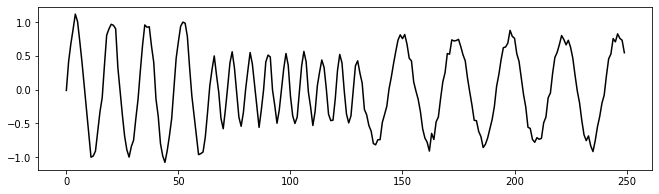

In [2]:
np.random.seed(12345)
d = [1.0 * math.sin(t * math.pi / 8) for t in range(64)]
d += [0.5 * math.sin(t * math.pi / 4) for t in range(64, 134)]
d += [0.8 * math.sin(t * math.pi / 12) for t in range(134, 250)]
d = [x + 0.06 * np.random.standard_normal() for x in d]

plt.figure(figsize=(11, 3))
plt.plot(d, color="black");

## Implementación del modelo usando clases y operaciones elementales de TF

In [3]:
class Model(object):
    def __init__(self, L):
        self.w = tf.Variable([0.0] * (L + 1))

    def __call__(self, x):
        x = tf.constant(np.array([1.0] + x, dtype=np.float32))
        y_pred = tf.reduce_sum(tf.multiply(self.w, x))
        return y_pred

    def fit(self, mu, x, y_desired):
        y_pred = self(x)
        e = y_desired - y_pred
        x = tf.constant(np.array([1.0] + x, dtype=np.float32))
        self.w.assign_add(tf.scalar_mul(2 * mu * e, x))

## Caso de uso

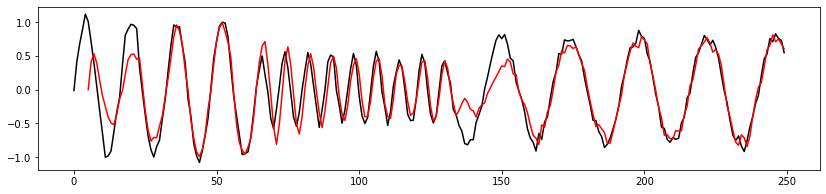

In [4]:
#
#  Para pronosticar el valor actual se toman los `L`
#  valores previos de la serie
#
L = 5

#
#  Modelo
#
model = Model(L)

#
#  Pronosticos del modelo
#
y_pred = np.empty(len(d))
y_pred[:] = np.nan

for t in range(L, len(d)):
    x = d[t - L : t]
    y_pred[t] = model(x)
    model.fit(mu=0.05, x=x, y_desired=d[t])

plt.figure(figsize=(14, 3))
plt.plot(d, color="black")
plt.plot(y_pred, color="red")